## Analysis of latency for BlueStore (4k 60s randwrite)

In this experiment, I set the 
```
bluestore_min_alloc_size = 4096
bluestore_prefer_deferred_size_ssd = 0
```
So, big writes/simple writes dominate.

We set the osd op_queue shard number to 1

bluestore_lat with deferred_writes over 1000 datapoints= 0.0008916726879999999 s
bluestore_lat with deferred_writes of all datapoints= 0.0007770997900807386 s


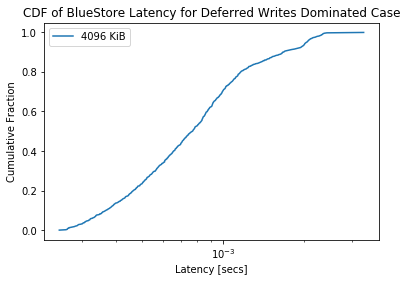

bluestore_lat with simple_writes over 10000 datapoints= 0.0008262386261000014 s
bluestore_lat with simple_writes of all datapoints= 0.0008475324661529466 s


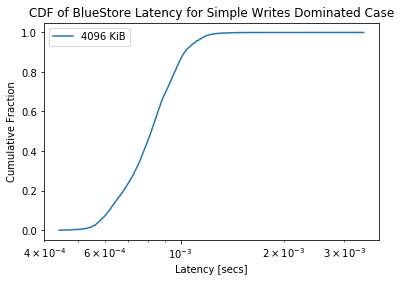

bluestore service latency for deferred_writes over 800 datapoints= 0.00048761499624999947 s
bluestore service latency for deferred_writes of all datapoints= 0.0004898538441988945 s


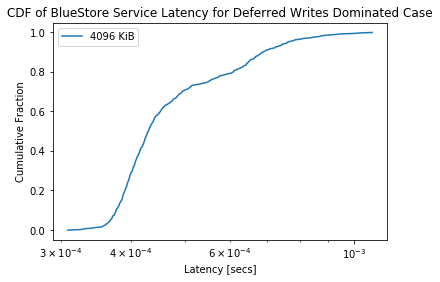

bluestore service latency for simple_writes over 10000 datapoints= 0.0006812862132999998 s
bluestore service latency for simple_writes of all datapoints= 0.0006916949133776283 s


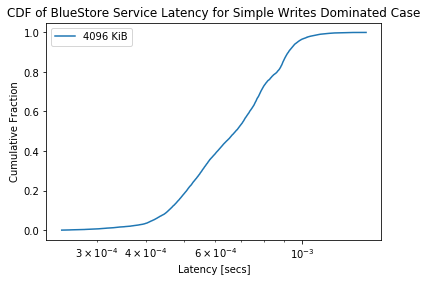

bluestore_lat over 10000 datapoints= 0.0008241963819000009 s
bluestore_lat of all datapoints= 0.0008456884338366357 s


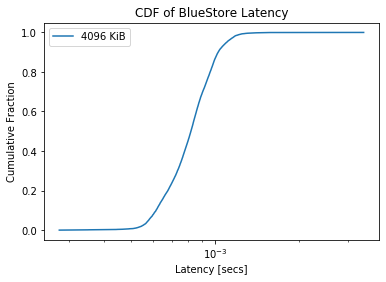

'# workload latency\nwith open(\'dump-fio-bench-48.json\') as f:\n  data2 = json.load(f)\navg_lat = data2[\'jobs\'][0][\'write\'][\'clat_ns\'][\'mean\']/1000000000\navg_throughput = data2[\'jobs\'][0][\'write\'][\'bw_bytes\']/1048576\nprint("Average Workload Latency =",avg_lat,"s")\nprint("Average Throughput =",avg_throughput,"MB/s")\nx2 = []\ny2 = []\nfor key, value in data2[\'jobs\'][0][\'write\'][\'clat_ns\'][\'percentile\'].items():\n    x2.append(value/1000000000)\n    y2.append(float(key)/100)\nfig, ax = plt.subplots()\nax.set_xscale(\'log\')\nax.plot(x2, y2, label=\'4096 KiB\')\nax.set(xlabel=\'Latency [secs]\', ylabel=\'Cumulative Fraction\', title=\'CDF of Workload Latency\')\nplt.legend()\nplt.show()\nplt.close()\n'

In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import json

# only plot deferred writes
x1 = []
y1 = []
f1='dump_bluestore_deferred_writes_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=0, nrows=1000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
alldata1 = read_csv(f1, header=0, parse_dates=True, squeeze=True)
avg_bs_lat_all = sum(alldata1) / len(alldata1)
print("bluestore_lat with deferred_writes over 1000 datapoints=",avg_bs_lat_partial,"s")
print("bluestore_lat with deferred_writes of all datapoints=",avg_bs_lat_all,"s")
for i in range(0, 1000, 2):
    x1.append(data1[int(i/1000. * len(data1))])
    y1.append(i/1000.)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Latency for Deferred Writes Dominated Case')
plt.legend()
plt.show()
plt.close()

# only plot simple writes(NONE)
x1 = []
y1 = []
f1='dump_bluestore_simple_writes_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=20000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
alldata1 = read_csv(f1, header=0, parse_dates=True, squeeze=True)
avg_bs_lat_all = sum(alldata1) / len(alldata1)
print("bluestore_lat with simple_writes over 10000 datapoints=",avg_bs_lat_partial,"s")
print("bluestore_lat with simple_writes of all datapoints=",avg_bs_lat_all,"s")
for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    y1.append(i/10000.)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Latency for Simple Writes Dominated Case')
plt.legend()
plt.show()
plt.close()

# only plot deferred service latency(no queueing time, no waiting time)
# for deferred writes: 2 flush, 1 commit, and 1 aio submit
x1 = []
y1 = []
f1='dump_bluestore_deferred_service_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=0, nrows=800, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
alldata1 = read_csv(f1, header=0, parse_dates=True, squeeze=True)
avg_bs_lat_all = sum(alldata1) / len(alldata1)
print("bluestore service latency for deferred_writes over 800 datapoints=",avg_bs_lat_partial,"s")
print("bluestore service latency for deferred_writes of all datapoints=",avg_bs_lat_all,"s")
for i in range(0, 800, 2):
    x1.append(data1[int(i/800. * len(data1))])
    y1.append(i/800.)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Service Latency for Deferred Writes Dominated Case')
plt.legend()
plt.show()
plt.close()

# only plot simple service latency(no queueing time, no waiting time)
# for simpe writes: 1 flush, 1 commit, and 1 aio submit
x1 = []
y1 = []
f1='dump_bluestore_simple_service_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=10000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
alldata1 = read_csv(f1, header=0, parse_dates=True, squeeze=True)
avg_bs_lat_all = sum(alldata1) / len(alldata1)
print("bluestore service latency for simple_writes over 10000 datapoints=",avg_bs_lat_partial,"s")
print("bluestore service latency for simple_writes of all datapoints=",avg_bs_lat_all,"s")
for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    y1.append(i/10000.)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Service Latency for Simple Writes Dominated Case')
plt.legend()
plt.show()
plt.close()

# plot all bluestore latency
# aio_lat + kv_lat
x1 = []
y1 = []
f1='dump_bluestore_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=20000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
alldata1 = read_csv(f1, header=0, parse_dates=True, squeeze=True)
avg_bs_lat_all = sum(alldata1) / len(alldata1)
print("bluestore_lat over 10000 datapoints=",avg_bs_lat_partial,"s")
print("bluestore_lat of all datapoints=",avg_bs_lat_all,"s")
for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    y1.append(i/10000.)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Latency')
plt.legend()
plt.show()
plt.close()

'''# workload latency
with open('dump-fio-bench-48.json') as f:
  data2 = json.load(f)
avg_lat = data2['jobs'][0]['write']['clat_ns']['mean']/1000000000
avg_throughput = data2['jobs'][0]['write']['bw_bytes']/1048576
print("Average Workload Latency =",avg_lat,"s")
print("Average Throughput =",avg_throughput,"MB/s")
x2 = []
y2 = []
for key, value in data2['jobs'][0]['write']['clat_ns']['percentile'].items():
    x2.append(value/1000000000)
    y2.append(float(key)/100)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x2, y2, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of Workload Latency')
plt.legend()
plt.show()
plt.close()
'''

Next, we try to observe the bluestore kv_queue size:

average kv_queue size = 1.3777


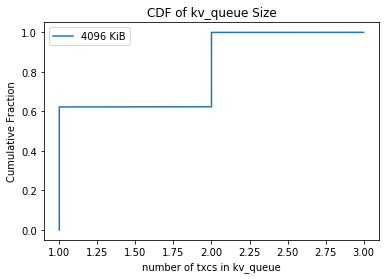

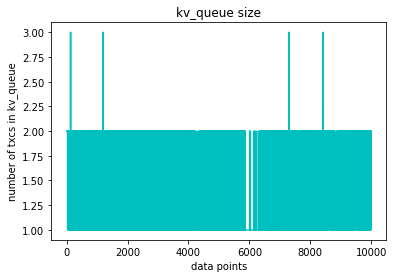

In [4]:
x1 = []
y1 = []
f1='dump_kv_queue_size_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=20000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
print("average kv_queue size =",avg_bs_lat_partial)

for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    y1.append(i/10000.)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='number of txcs in kv_queue', ylabel='Cumulative Fraction', title='CDF of kv_queue Size')
plt.legend()
plt.show()
plt.close()

data2=read_csv(f1, header=0, skiprows=20000, nrows=10000, parse_dates=True, squeeze=True)
fig, ax = plt.subplots()
data2.plot(style='c-', label='kv_queue_size')
ax.set(xlabel='data points', ylabel='number of txcs in kv_queue', title='kv_queue size') 
plt.show()
plt.close()    

Next, we try to observe the OSD sharded op_queue size:

average op_queue size = 1.1294


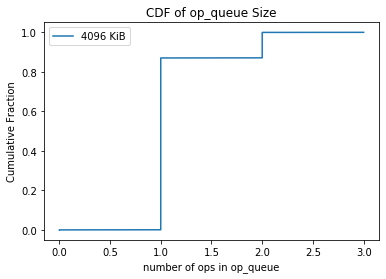

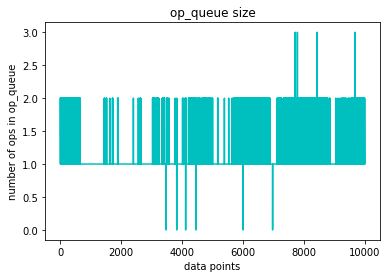

In [5]:
x1 = []
y1 = []
f1='dump_opq_size_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=20000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
print("average op_queue size =",avg_bs_lat_partial)

for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    y1.append(i/10000.)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='number of ops in op_queue', ylabel='Cumulative Fraction', title='CDF of op_queue Size')
plt.legend()
plt.show()
plt.close()

data2=read_csv(f1, header=0, skiprows=20000, nrows=10000, parse_dates=True, squeeze=True)
fig, ax = plt.subplots()
data2.plot(style='c-', label='4096 KiB')
ax.set(xlabel='data points', ylabel='number of ops in op_queue', title='op_queue size') 
plt.show()
plt.close()    